Consideremos una empresa que va a lanzar al mercado un nuevo modelo de camiseta. Evidentemente tendrán que fabricar modelos en diferentes tallas para satisfacer a personas de todas las tallas. Entonces, la empresa genera datos sobre la altura y el peso de las personas y los representa en un gráfico,

La empresa no puede crear camisetas con todas las tallas. En cambio, dividen a las personas en Pequeñas, Medianas y Grandes, y fabrican sólo estos 3 modelos que se adaptan a todas las personas. Esta agrupación de personas en tres grupos se puede realizar mediante agrupación de k-medias, y el algoritmo nos proporciona los 3 mejores tamaños, que satisfarán a todas las personas. Y si no es así, la empresa puede dividir a las personas en más grupos, pueden ser cinco, y así sucesivamente.

- El algoritmo elige aleatoriamente dos centroides,C1 y C2(A veces, dos datos cualesquiera se toman como centroides).

- Calcula la distancia desde cada punto a ambos centroides. Si los datos de una prueba están más cerca de C1, entonces esos datos están etiquetados con '0'. Si está más cerca de C2, luego etiquetado como '1' (si hay más centroides, etiquetado como '2', '3', etc.).

- Calculamos el promedio de todos los puntos azules y rojos por separado y esos serán nuestros nuevos centroides. Eso es C1 y C2 cambiar a centroides recién calculados.

Y nuevamente se calcula la distancia desde cada punto a ambos centroides. Si los datos de una prueba están más cerca de C1, entonces esos datos están etiquetados con '0'. Si está más cerca de C2, luego etiquetado como '1'. 

- K-Means Clustering in OpenCV

Parámetros:
 - Parámetros de entrada:
    - muestras : debe ser del tipo de datos np.float32 y cada característica debe colocarse en una sola columna.
    - nclusters(K) : número de clústeres necesarios al final
    - criterios : Es el criterio de terminación de la iteración. Cuando se cumple este criterio, la iteración del algoritmo se detiene. En realidad, debería ser una tupla de 3 parámetros. Son `(tipo, max_iter, épsilon)`:
        - tipo de criterios de terminación. Tiene 3 banderas como se muestra a continuación:
            - cv.TERM_CRITERIA_EPS : detiene la iteración del algoritmo si se alcanza la precisión especificada, épsilon .
            - cv.TERM_CRITERIA_MAX_ITER : detiene el algoritmo después del número especificado de iteraciones, max_iter .
            - cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER : detiene la iteración cuando se cumple alguna de las condiciones anteriores.
        - max_iter: un número entero que especifica el número máximo de iteraciones.
        - épsilon: precisión requerida
    - intentos : Bandera para especificar el número de veces que se ejecuta el algoritmo utilizando diferentes etiquetas iniciales. El algoritmo devuelve las etiquetas que producen la mejor compacidad. Esta compacidad se devuelve como salida.
    -banderas : esta bandera se utiliza para especificar cómo se toman los centros iniciales. Normalmente se utilizan dos indicadores para esto: cv.KMEANS_PP_CENTERS y cv.KMEANS_RANDOM_CENTERS .
  - Parámetros de salida
        - Compacidad : Es la suma de las distancias al cuadrado desde cada punto hasta sus centros correspondientes.
        - etiquetas : esta es la matriz de etiquetas (igual que el 'código' en el artículo anterior) donde cada elemento está marcado como '0', '1'.....
        - centros : Este es un conjunto de centros de conglomerados.  

A modo de ejemplo tenemos un conjunto de datos con una sola característica, es decir, unidimensional. Por ejemplo, podemos tomar nuestro problema de la camiseta en el que solo utilizamos la altura de las personas para decidir la talla de la camiseta.

Entonces comenzamos creando datos y trazándolos en Matplotlib

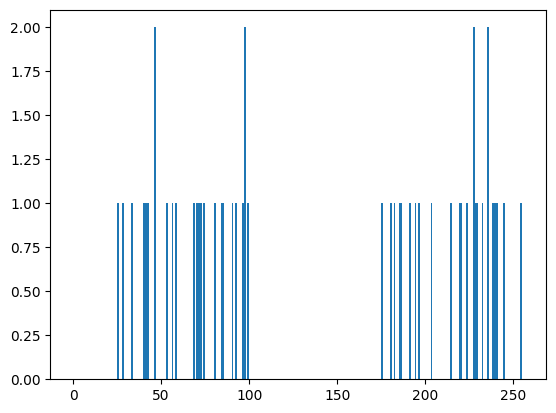

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 2., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 2., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
         0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
z = np.hstack((x,y))
z = z.reshape((50,1))
z = np.float32(z)
plt.hist(z,256,[0,256]),plt.show()

Ahora aplicamos la función KMeans. Antes de eso necesitamos especificar los criterios. Mi criterio es tal que, siempre que se ejecuten 10 iteraciones del algoritmo o se alcance una precisión de épsilon = 1,0, detenga el algoritmo y devuelva la respuesta.

In [2]:
# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Set flags (Just to avoid line break in the code)
flags = cv.KMEANS_RANDOM_CENTERS
# Apply KMeans
compactness,labels,centers = cv.kmeans(z,2,None,criteria,10,flags)

 El codigo anterior nos da la compacidad, etiquetas y centros. En este caso, obtuve centros como 60 y 207. Las etiquetas tendrán el mismo tamaño que los datos de prueba, donde cada dato se etiquetará como '0', '1', '2', etc., dependiendo de sus centroides. Ahora dividimos los datos en diferentes grupos según sus etiquetas.

In [3]:
A = z[labels==0]
B = z[labels==1]

Ahora trazamos A en color rojo y B en color azul y sus centroides en color amarillo.

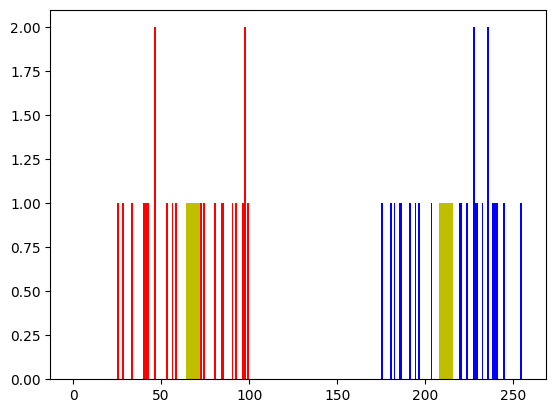

In [4]:
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

- Data with Multiple Features

A diferencia del ejemplo anterior tomaremos tanto la altura como el peso, es decir, dos características.

Recuerde, en el caso anterior, convertimos nuestros datos en un vector de una sola columna. Cada característica está organizada en una columna, mientras que cada fila corresponde a una muestra de prueba de entrada.

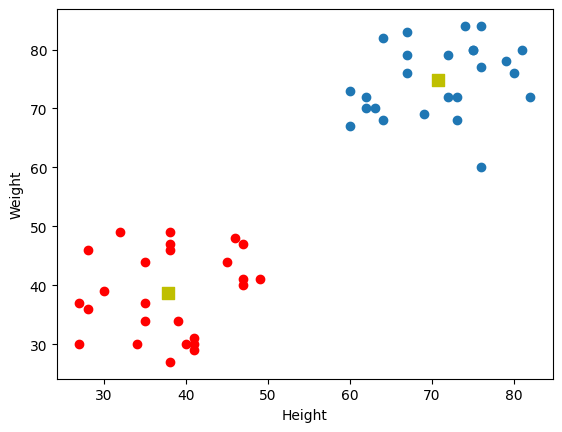

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
# convert to np.float32
Z = np.float32(Z)
# define criteria and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

- Color Quantization

La cuantización del color es el proceso de reducir la cantidad de colores en una imagen. Una razón para hacerlo es reducir la memoria. A veces, algunos dispositivos pueden tener limitaciones tales que solo pueden producir una cantidad limitada de colores. También en esos casos se realiza la cuantificación del color. Aquí utilizamos la agrupación de k-medias para la cuantificación del color.

Aquí hay 3 características, digamos, R,G,B. Entonces necesitamos remodelar la imagen a una matriz de tamaño Mx3 (M es el número de píxeles de la imagen). Y después de la agrupación, aplicamos valores de centroide (también es R,G,B) a todos los píxeles, de modo que la imagen resultante tendrá un número específico de colores. Y nuevamente necesitamos remodelarlo para que tenga la forma de la imagen original

In [6]:
import numpy as np
import cv2 as cv
img = cv.imread('resources/home.jpg')
Z = img.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/dread/miniconda3/envs/tf/lib/python3.9/site-packages/cv2/qt/plugins"
